# Likelihoods

In [3]:
require(tidyverse)
require(patchwork)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: patchwork



In [3]:
x = 2 # heads
n = 3 # total
t = n - x # tails

In [6]:
p = .5

In [58]:
x = 5; t = 5; n = x + t; p = 0.5; choose(n,x) * p^x * (1 - p)^(n-x)

[1] 0.2460938

In [11]:
x = 6; t = 4; n = x + t; p = 0.75; choose(n,x) * p^x * (1 - p)^(n-x)

[1] 0.145998

In [12]:
dbinom(x = 6, 10, .75)

[1] 0.145998

In [43]:

n = 10 # number of flips 
p = 0.5 # probability of heads
flip_coins<-function(n,p){
    purrr::rbernoulli(n = n, p = p) %>% 
    enframe() %>% 
    summarise(x = sum(value), n = n())
}

In [59]:
map_df(1:10000, function(x) flip_coins(10,.5)) -> x100_flips

In [73]:
X = 6; T = 4; N = X + T; P = 0.5;
furrr::future_map_dfr(1:10000, function(x) flip_coins(N,P)) %>% 
       mutate(match = case_when(x == X ~ 1, TRUE ~ 0)) %>% pull(match) %>% mean()

[1] 0.2098

In [74]:
choose(N,X) * P^X * (1 - P)^(N-X)

[1] 0.2050781

In [75]:
dbinom(6, , P)

[1] 0.2050781

In [32]:
n = 10 # number of flips
h = 7 # number of heads
t = n - h # number of tails
h1 = 0.3 # the probability of getting heads is 0.5
h2 = 0.9 # the probability of getting heads is 0.7

In [33]:
dbinom(h,n, h1) -> L1
dbinom(h,n, h2) -> L2
glue::glue("The likelihood under $\\mathcal{{H}}_1$ ($Pr_{{heads}}$ = {h1}) is {round(L1,2)}  
The likelihood under $\\mathcal{{H}}_2$ ($Pr_{{heads}}$ = {h2}) is {round(L2,2)}   
The likelihood ratio is {round(L1/L2,2)}  
The data are {round(L1/L2,2)} times more probable under $\\mathcal{{H}}_1$ than $\\mathcal{{H}}_2$") %>% 
IRdisplay::display_markdown()

The likelihood under $\mathcal{H}_1$ ($Pr_{heads}$ = 0.3) is 0.01  
The likelihood under $\mathcal{H}_2$ ($Pr_{heads}$ = 0.9) is 0.06   
The likelihood ratio is 0.16  
The data are 0.16 times more probable under $\mathcal{H}_1$ than $\mathcal{H}_2$

In [34]:
dnbinom(t,h,h1) -> L1
dnbinom(t,h,h2) -> L2
glue::glue("The likelihood under $\\mathcal{{H}}_1$ ($Pr_{{heads}}$ = {h1}) is {round(L1,2)}  
The likelihood under $\\mathcal{{H}}_2$ ($Pr_{{heads}}$ = {h2}) is {round(L2,2)}   
The likelihood ratio is {round(L1/L2,2)}  
The data are {round(L1/L2,2)} times more probable under $\\mathcal{{H}}_1$ than $\\mathcal{{H}}_2$") %>% 
IRdisplay::display_markdown()

The likelihood under $\mathcal{H}_1$ ($Pr_{heads}$ = 0.3) is 0.01  
The likelihood under $\mathcal{H}_2$ ($Pr_{heads}$ = 0.9) is 0.04   
The likelihood ratio is 0.16  
The data are 0.16 times more probable under $\mathcal{H}_1$ than $\mathcal{H}_2$

In [41]:
dbinom(8, 10, 0.6) - dbinom(8, 10, 0.8)

[1] -0.1810575

In [36]:
h1 = 0.5
h2 = seq(0,1,1/n) 
LR1 = dbinom(h,n,h1) 
LR2 = dbinom(h,n,h2) 

LRs = glue::glue_collapse(round(LR2 / LR1,2), ", ")
avg_LR = 1/(mean(LR2) / LR1)
glue::glue("Our $\\mathcal{{H}}_1: Pr_{{heads}} = {h1}$   
Our $\\mathcal{{H}}_2: Pr_{{heads}} = {glue::glue_collapse(h2,'; ')}$  
Our {n} likelihood ratios are: {LRs}   
The average likelihood ratio is {round(avg_LR,2)}   
The data are {round(avg_LR,2)} times more probable under $\\mathcal{{H}}_1$ than $\\mathcal{{H}}_2$") %>%
IRdisplay::display_markdown()

Our $\mathcal{H}_1: Pr_{heads} = 0.5$   
Our $\mathcal{H}_2: Pr_{heads} = 0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1$  
Our 10 likelihood ratios are: 0, 0, 0.01, 0.08, 0.36, 1, 1.83, 2.28, 1.72, 0.49, 0   
The average likelihood ratio is 1.42   
The data are 1.42 times more probable under $\mathcal{H}_1$ than $\mathcal{H}_2$

In [173]:
exp(log(L1) - log(L2))

[1] 0.7059337

In [156]:
glue::glue("Our $\\mathcal{{H}}_1: Pr_{{heads}} = {h1}$   
Our $\\mathcal{{H}}_1: Pr_{{heads}} = {h2}$")

Our $\mathcal{{H}}_1: Pr_{{heads}} = {h1}$   
Our $\mathcal{{H}}_1: Pr_{{heads}} = {h2}$

In [175]:
mean(LR2 / LR1)

[1] 0.7059337

Let's formalise this idea a bit. First, we'll drop the terminology *hypothesis*, and replace it with *model*. And we'll say that our data favours $\mathcal{M_1}$ over $\mathcal{M_2}$ by a factor of $\frac{\mathcal{M}_1}{\mathcal{M}_2}$. And second, we'll say that the value of $\mathcal{M}_H$ is going to be the average likelihood of all the $n$ sub-hypotheses ($\Theta=\left \{ \theta_1, \theta_2,\ldots\theta_n\right \}$)  that make up $\mathcal{M}_M$. Or, 

 $$\mathcal{M}_H = \sum_{i=1}^{n}\mathcal{L}_H(\theta_i|\mathbf{y})\frac{1}{n}$$   


In [ ]:
M = \sum_{i=1}^{n}f_H(\theta_i;\mathbf{y})\frac{1}{n}


In [211]:
n = 10 # number of flips
h = 5 # number of heads
t = n - h # number of tails
s1 = 10; s2 = 10
theta_range = seq(0,1,1/n)


w1 = map_dbl(theta_range, function(x) ifelse(x == 0.5, 1, 0))
sum(w1)==1


w2 = (dbeta(x = theta_range,s1,s2)) / sum(dbeta(x = theta_range,s1,s2))
sum(w2)==1

L1 = dbinom(h,n,theta_range)
M1 =  L1 * w1
L2 = dbinom(h,n,theta_range)
M2 = L2 * w2
BF = (mean(M1) / mean(M2))



tibble(prior_1 = w1,
       prior_2 = w2, 
       like_1 = L1, 
       like_2 = L2,
       M_1 = M1,
       M_2 = M2, 
       theta = theta_range) -> df
  
df %>% pivot_longer(names(df)[!(names(df) %in% "theta")],names_to = c("type","model"),names_sep = "_") -> df


[1] TRUE

[1] TRUE

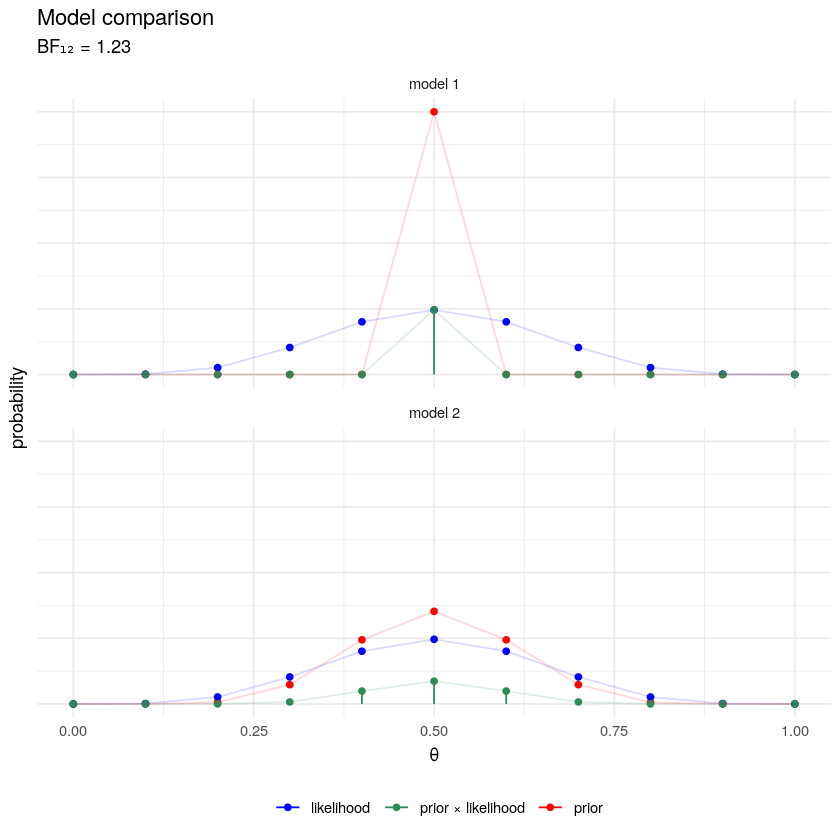

In [213]:


df %>% ggplot(aes(x = theta, y = value, 
                  group = interaction(type,model),
                  colour = type)) + 
  geom_point() + geom_line(linetype = 1, alpha = .15) + 
  geom_segment(. %>% filter(type == "M"), 
               mapping = aes(xend = theta), yend = 0) +
  facet_wrap(.~model,nrow = 2, labeller = labeller(model = c("1" = "model 1", "2" = "model 2"))) + 
  scale_color_manual(values = c("prior" = "red", "like" = "blue", "M" = "seagreen"),
                     name = NULL, labels = c(prior = 'prior', 
                                             like = "likelihood",
                                             M = "prior × likelihood")) + 
  theme_minimal() + theme(legend.position = "bottom") + 
  scale_x_continuous("θ") + scale_y_continuous(name = "probability", labels = NULL) + labs(title = "Model comparison",
subtitle = sprintf(paste0("BF\u2081\u2082 = ",round(BF,2)),fmt = "%s"))

In [204]:
df %>% pivot_longer(!theta,names_to = c("type","model"),names_sep = "_") -> df


ERROR: Error in .f(.x[[i]], ...): object 'theta' not found


In [20]:
bf_func<-function(h,n,s1,s2){
    t = 1/n
  theta_range = seq(0+t,1-t,1/n)

  w1 = map_dbl(theta_range, function(x) ifelse(x == 0.5, 1, 0))
  w2 = (dbeta(x = theta_range,s1,s2)) / sum(dbeta(x = theta_range,s1,s2))


  L1 = dbinom(h,n,0.5)
  M1 =  L1 * w1
  
  L2 = dbinom(h,n,theta_range)
  M2 = L2 * w2
  BF = (mean(M1) / mean(M2))
  
  tibble(x =theta_range, 
         y = w2) -> dat 
  ggplot(data = dat, aes(x = x, y = y)) + 
       geom_line() + 
        geom_vline(xintercept = h/n, linetype = 2, alpha = .3) +
    labs(x = "θ", y = "p(θ)", title = glue::glue("BF M1/M2 = {round(BF,2)}")) + 
    theme_minimal() -> p
  return(p)
}

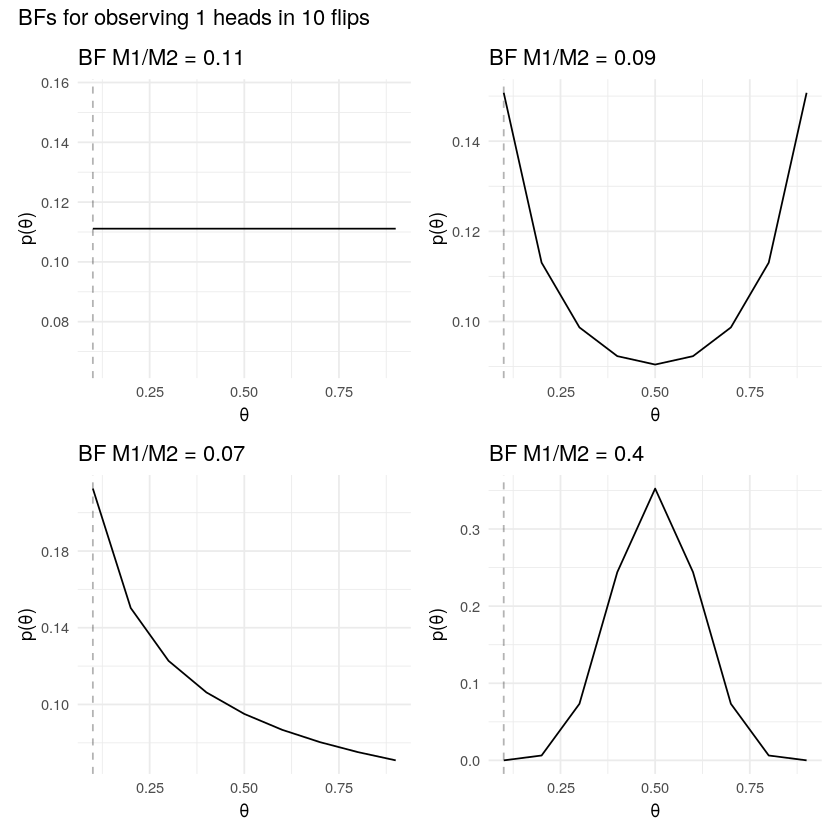

In [24]:
h = 1; n = 10; 

bf_func(h,n,1,1) +
bf_func(h,n,.5,.5) +
bf_func(h,n,.5,1) +
bf_func(h,n,10,10) %>% 
  wrap_plots() + plot_annotation(title = glue::glue("BFs for observing {h} heads in {n} flips"))

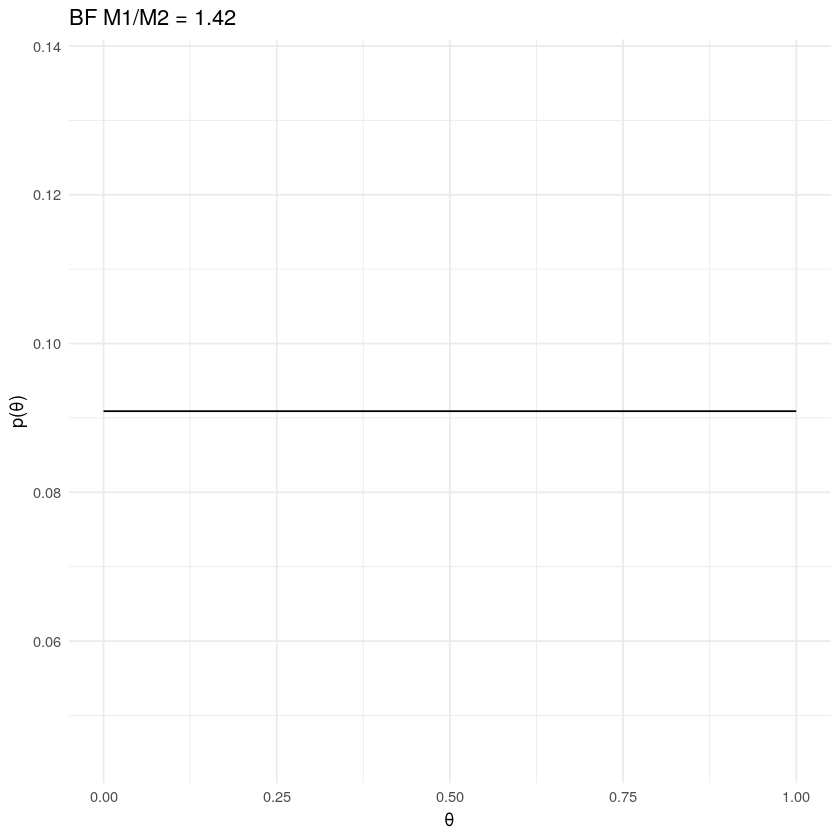

In [236]:
bf_func(h,n,1,1)